In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [43]:
nba_salaries= pd.read_csv("salaries_1985to2018.csv")
nba_players=pd.read_csv("players.csv")



In [52]:
pd.DataFrame(nba_players).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 24 columns):
_id            4685 non-null object
birthDate      4657 non-null object
birthPlace     4185 non-null object
career_AST     4685 non-null float64
career_FG%     4685 non-null object
career_FG3%    3557 non-null object
career_FT%     4685 non-null object
career_G       4685 non-null int64
career_PER     4685 non-null object
career_PTS     4685 non-null float64
career_TRB     4685 non-null object
career_WS      4685 non-null object
career_eFG%    3557 non-null object
college        4372 non-null object
draft_pick     3369 non-null object
draft_round    3507 non-null object
draft_team     3507 non-null object
draft_year     3306 non-null object
height         4685 non-null object
highSchool     4025 non-null object
name           4685 non-null object
position       4685 non-null object
shoots         4684 non-null object
weight         4680 non-null object
dtypes: float64(2), int64(1)

In [ ]:
nba_players

In [6]:
nba_players.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [7]:
nba_players.columns

Index(['_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight'],
      dtype='object')

In [26]:
nba_players=nba_players.dropna(how = 'any')

In [9]:
nba_players=nba_players.drop(columns=['_id', 'birthPlace', 'college', 'highSchool', 'birthDate',"shoots"])

In [10]:
nba_players = nba_players[nba_players.draft_year >= '2000']
nba_players.head()

,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,draft_pick,draft_round,draft_team,draft_year,height,name,position,weight
10,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,-0.2,41.3,60th overall,2nd round,Detroit Pistons,2005,6-5,Alex Acker,Shooting Guard,185lb
14,0.6,44.4,35.0,75.9,337,11.2,4.9,3.5,8.7,51.3,37th overall,2nd round,Toronto Raptors,2012,6-7,Quincy Acy,Power Forward and Small Forward,240lb
18,0.2,53.4,0.0,64.3,73,11.8,2.5,1.2,0.8,53.4,54th overall,2nd round,New Jersey Nets,2006,6-4,Hassan Adams,Shooting Guard,220lb
20,0.6,40.2,38.5,60.7,32,13.1,3.2,0.9,0.4,45.7,22nd overall,1st round,Memphis Grizzlies,2014,6-5,Jordan Adams,Shooting Guard,209lb
22,1.0,58.8,0.0,55.3,467,16.7,9.7,7.4,38.7,58.8,12th overall,1st round,Oklahoma City Thunder,2013,7-0,Steven Adams,Center,265lb


In [11]:
nba_players=nba_players[['name','position', 'height', 'weight', 'draft_year', 'draft_pick', 'draft_round', 'draft_team'
           ,'career_AST', 'career_FG%', 'career_FG3%','career_FT%', 'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS', 'career_eFG%']]
nba_players.head()

,name,position,height,weight,draft_year,draft_pick,draft_round,draft_team,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%
10,Alex Acker,Shooting Guard,6-5,185lb,2005,60th overall,2nd round,Detroit Pistons,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,-0.2,41.3
14,Quincy Acy,Power Forward and Small Forward,6-7,240lb,2012,37th overall,2nd round,Toronto Raptors,0.6,44.4,35.0,75.9,337,11.2,4.9,3.5,8.7,51.3
18,Hassan Adams,Shooting Guard,6-4,220lb,2006,54th overall,2nd round,New Jersey Nets,0.2,53.4,0.0,64.3,73,11.8,2.5,1.2,0.8,53.4
20,Jordan Adams,Shooting Guard,6-5,209lb,2014,22nd overall,1st round,Memphis Grizzlies,0.6,40.2,38.5,60.7,32,13.1,3.2,0.9,0.4,45.7
22,Steven Adams,Center,7-0,265lb,2013,12th overall,1st round,Oklahoma City Thunder,1.0,58.8,0.0,55.3,467,16.7,9.7,7.4,38.7,58.8


In [12]:
nba_players.describe()

,career_AST,career_G,career_PTS
count,779.000000,779.000000,779.000000
mean,1.520282,298.243902,7.142105
std,1.473092,278.378567,4.931148
min,0.000000,1.000000,0.000000
25%,0.500000,67.000000,3.300000
50%,1.000000,200.000000,6.000000
75%,2.000000,484.500000,9.600000
max,9.700000,1326.000000,27.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9653272048>,
      dtype=object)

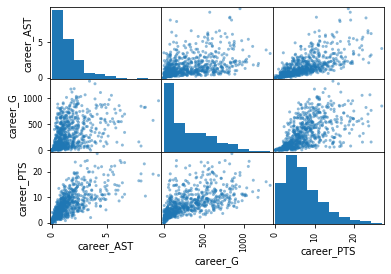

In [78]:
pd.plotting.scatter_matrix(nba_players)

,name,position,height,weight,draft_year,draft_pick,draft_round,draft_team,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%
10,Alex Acker,Shooting Guard,6-5,185lb,2005,60th overall,2nd round,Detroit Pistons,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,-0.2,41.3
14,Quincy Acy,Power Forward and Small Forward,6-7,240lb,2012,37th overall,2nd round,Toronto Raptors,0.6,44.4,35.0,75.9,337,11.2,4.9,3.5,8.7,51.3
18,Hassan Adams,Shooting Guard,6-4,220lb,2006,54th overall,2nd round,New Jersey Nets,0.2,53.4,0.0,64.3,73,11.8,2.5,1.2,0.8,53.4
20,Jordan Adams,Shooting Guard,6-5,209lb,2014,22nd overall,1st round,Memphis Grizzlies,0.6,40.2,38.5,60.7,32,13.1,3.2,0.9,0.4,45.7
22,Steven Adams,Center,7-0,265lb,2013,12th overall,1st round,Oklahoma City Thunder,1.0,58.8,0.0,55.3,467,16.7,9.7,7.4,38.7,58.8


In [28]:
nba=nba_players.drop(columns=['_id', 'birthPlace', 'college', 'highSchool', 'birthDate','college','draft_pick','draft_round','draft_team', 'draft_year', 'height', 'highSchool','name', 'position', 'shoots', 'weight'])

In [29]:
nba.head()

,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%
0,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2
2,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9
3,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2
4,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2
5,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9


In [34]:
nba.apply(lambda x: pd.to_numeric(x, errors = 'coerce')).dropna()

,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%
0,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2
2,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9
3,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2
4,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2
5,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9
...,...,...,...,...,...,...,...,...,...,...
4661,1.7,50.1,32.9,67.3,901,16.4,13.4,6.0,59.7,52.1
4663,8.1,41.8,32.4,82.9,81,17.0,19.1,3.7,3.3,48.0
4667,1.4,51.1,26.3,74.0,361,15.5,8.2,5.8,24.1,51.3
4672,0.9,50.9,28.6,76.4,412,14.9,7.0,4.4,17.1,51.1


In [36]:
nba[nba.applymap(lambda x: str(x).isdecimal()).all(1)].astype(int)

,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%


,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%
0,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2
2,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9
3,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2
4,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2
5,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9


In [38]:
km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

In [40]:
y_km = km.fit_predict(nba.head())

In [42]:
km.cluster_centers_

array([[3.500e+00, 4.420e+01, 3.540e+01, 9.050e+01, 5.860e+02, 1.540e+01,
        1.460e+01, 1.900e+00, 2.520e+01, 4.720e+01],
       [3.000e-01, 5.020e+01, 0.000e+00, 7.010e+01, 2.560e+02, 1.300e+01,
        5.700e+00, 3.300e+00, 4.800e+00, 5.020e+01],
       [3.600e+00, 5.590e+01, 5.600e+00, 7.210e+01, 1.560e+03, 2.460e+01,
        2.460e+01, 1.120e+01, 2.734e+02, 5.590e+01],
       [1.100e+00, 4.170e+01, 2.370e+01, 7.030e+01, 2.360e+02, 1.140e+01,
        7.800e+00, 3.300e+00, 3.500e+00, 4.220e+01],
       [2.500e+00, 4.720e+01, 2.970e+01, 8.100e+01, 8.300e+02, 1.900e+01,
        1.810e+01, 7.500e+00, 7.120e+01, 4.790e+01]])

In [85]:
nba_data = pd.read_csv("NBA_Career_Data.csv")

In [86]:
nba_data.head()

,name,position,height,careerAST,careerFG,careerFG3,careerFT,careerG,careerPER,careerPTS,careerTRB,careerWS,careereFG,salary,Center,Point Guard,Power Forward,Shooting Guard,Small Forward,Salary_lvl
0,Alaa Abdelnaby,Power Forward,82,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,568800.0,0,0,1,0,0,rookie_deal
1,Mahmoud Abdul-Rauf,Point Guard,73,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,2205500.0,0,1,0,0,0,rookie_deal
2,Tariq Abdul-Wahad,Shooting Guard,78,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,3798280.0,0,0,0,1,0,veteran_min
3,Shareef Abdur-Rahim,Center,81,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,8715090.9,1,0,0,0,0,max
4,Alex Abrines,Shooting Guard,78,0.5,38.7,36.8,88.0,174,8.8,5.3,1.4,5.0,52.5,5994764.0,0,0,0,1,0,veteran_min


In [87]:
nba_data = nba_data.drop(columns=["Salary_lvl", "name", "position"])

In [88]:
s_data = nba_data['salary']

In [89]:
nba_final = nba_data.drop(columns="salary")

In [90]:
nba_final.head()

,height,careerAST,careerFG,careerFG3,careerFT,careerG,careerPER,careerPTS,careerTRB,careerWS,careereFG,Center,Point Guard,Power Forward,Shooting Guard,Small Forward
0,82,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,0,0,1,0,0
1,73,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,0,1,0,0,0
2,78,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,0,0,0,1,0
3,81,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,1,0,0,0,0
4,78,0.5,38.7,36.8,88.0,174,8.8,5.3,1.4,5.0,52.5,0,0,0,1,0


In [92]:
nba_final.insert(len(nba_final.columns), "salary", s_data)

In [93]:
nba_final.head()

,height,careerAST,careerFG,careerFG3,careerFT,careerG,careerPER,careerPTS,careerTRB,careerWS,careereFG,Center,Point Guard,Power Forward,Shooting Guard,Small Forward,salary
0,82,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,0,0,1,0,0,568800.0
1,73,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,0,1,0,0,0,2205500.0
2,78,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,0,0,0,1,0,3798280.0
3,81,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,1,0,0,0,0,8715090.9
4,78,0.5,38.7,36.8,88.0,174,8.8,5.3,1.4,5.0,52.5,0,0,0,1,0,5994764.0


In [104]:
nba_array = nba_final.to_numpy()

In [111]:
nba_array[:,range(0,15)]

array([[82. ,  0.3, 50.2, ...,  0. ,  1. ,  0. ],
       [73. ,  3.5, 44.2, ...,  1. ,  0. ,  0. ],
       [78. ,  1.1, 41.7, ...,  0. ,  0. ,  1. ],
       ...,
       [84. ,  0.2, 40.8, ...,  0. ,  0. ,  0. ],
       [80. ,  0.8, 37.1, ...,  0. ,  0. ,  0. ],
       [85. ,  0.8, 54. , ...,  0. ,  0. ,  0. ]])

In [112]:
regression_model = LinearRegression()
regression_model.fit(nba_array[:,range(0,15)], nba_array[:,16])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
array_sol = regression_model.predict(nba_array[:,range(0,15)]) - nba_array[:,16]

In [116]:
array_sol

array([  512578.77810979,   561934.64796546, -2261613.57955262, ...,
         196799.66620828,   540283.77364491,  1111842.48729931])

In [121]:
regression_model.score(nba_array[:,range(0,15)], nba_array[:,16])

0.6040723105087087

In [238]:
X = nba_array[:,range(0,15)]
Y = nba_array[:,16]

2205500.0

In [212]:
polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(X)
model = LinearRegression()
model.fit(x_poly, Y)
y_poly_pred = model.predict(x_poly)

In [213]:
rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
r2 = r2_score(Y,y_poly_pred)
print(rmse)
print(r2)

1586840.7062541062
0.6040723105087087


In [133]:
k_m_data = pd.read_csv("NBA_Career_Data_2.csv")

In [137]:
k_m_data= k_m_data.drop(columns=["salary", "name", "position"])
k_m_data.head()

,height,careerAST,careerFG,careerFG3,careerFT,careerG,careerPER,careerPTS,careerTRB,careerWS,careereFG,Center,Point Guard,Power Forward,Shooting Guard,Small Forward,Salary_lvl
0,82,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,0,0,1,0,0,0
1,73,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,0,1,0,0,0,1
2,78,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,0,0,0,1,0,1
3,81,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,1,0,0,0,0,3
4,78,0.5,38.7,36.8,88.0,174,8.8,5.3,1.4,5.0,52.5,0,0,0,1,0,2


In [138]:
k_m_data2 = k_m_data.to_numpy()

IndexError: index 17 is out of bounds for axis 1 with size 17

In [149]:
km2 = KMeans(n_clusters=4, init='random', n_init=10, max_iter=2000, tol=1e-04, random_state=0)

In [154]:
y_km = km.fit_predict(k_m_data2[:,range(0,15)], k_m_data2[:,16])

In [155]:
km.score(k_m_data2[:,range(0,15)], k_m_data2[:,16])

-11603301.366839498

In [156]:
rmse = np.sqrt(mean_squared_error(k_m_data2[:,16],y_km))
r2 = r2_score(k_m_data2[:,16],y_km)
print(rmse)
print(r2)

1.7978902585149943
-3.6291526736909265


In [157]:
km.labels_

array([2, 3, 2, ..., 0, 0, 0])

In [161]:
k_m_data2[:,16]

array([0., 1., 1., ..., 0., 0., 0.])

In [164]:
completeness_score(k_m_data2[:,16], y_km)

0.15346611118134632

In [167]:
accuracy_score(k_m_data2[:,16], y_km)

0.3683368869936034

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
y_train.reshape(len(y_train), 1)
y_test.reshape(len(y_test), 1)

array([[5.43471000e+05],
       [7.33200000e+05],
       [1.66232000e+06],
       [1.06737470e+06],
       [3.06710240e+06],
       [4.31796740e+06],
       [4.50000000e+05],
       [1.42846730e+06],
       [7.57243700e+05],
       [3.03721330e+06],
       [2.95000000e+05],
       [5.38340000e+04],
       [2.94144000e+06],
       [6.85504090e+06],
       [2.05000000e+05],
       [9.53839320e+06],
       [2.90592000e+06],
       [2.00000000e+05],
       [5.43471000e+05],
       [3.89178410e+06],
       [6.04550120e+06],
       [3.36250000e+05],
       [4.48818380e+06],
       [1.43108330e+06],
       [4.58349540e+06],
       [1.39666670e+06],
       [4.19965350e+06],
       [6.83766000e+05],
       [6.18985500e+05],
       [4.98423600e+05],
       [3.23429240e+06],
       [5.74566000e+05],
       [3.16500000e+05],
       [7.05000000e+05],
       [1.11888111e+07],
       [2.25000000e+05],
       [1.75513300e+05],
       [7.30043500e+05],
       [4.57588000e+05],
       [2.41681140e+06],


In [191]:
for i in range(2,6):
    polynomial_features= PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit_transform(X_train)
    x_test_poly = polynomial_features.fit_transform(X_test)
    model = LinearRegression()
    model.fit(x_poly, y_train)
    y_poly_pred = model.predict(x_test_poly)
    r2 = r2_score(y_test,y_poly_pred)
    print(r2)

0.5962684645546267
-5.969674369137664
-672.3062057821559
-2219.4837823422586
-30255.463118198008
-2060818.9815725524
-101459450.99235508


MemoryError: 

In [180]:
X_test.shape

(620, 15)

In [184]:
X_train.shape

(1256, 15)

In [196]:
polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)
model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly_test)
#r2 = r2_score(y_test,y_poly_pred)
#r2
model.score(x_poly_test, y_test)

0.52809595496889

In [186]:
x_poly.shape

(1256, 136)

In [201]:
test_plot_X = [1, 2, 3, 4, 5]
test_plot_y = [0.52809595496889, 0.5962684645546267, -5.969674369137664,-672.3062057821559,-2219.4837823422586]

test_plot_X2 = [1, 2]
test_plot_y2 = [0.52809595496889, 0.5962684645546267]

Text(0, 0.5, 'R2 Score')

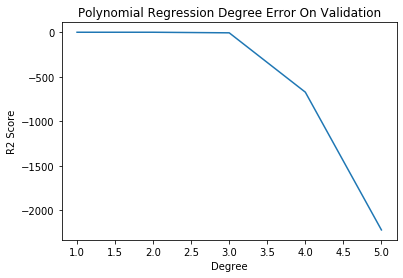

In [202]:
plt.plot(test_plot_X, test_plot_y)
plt.title("Polynomial Regression Degree Error On Validation")
plt.xlabel("Degree")
plt.ylabel("R2 Score")

Text(0, 0.5, 'R2 Score')

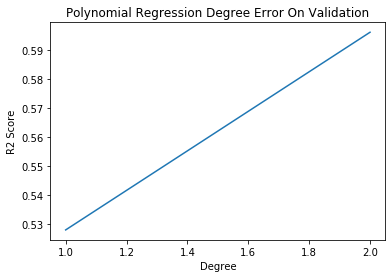

In [203]:
plt.plot(test_plot_X2, test_plot_y2)
plt.title("Polynomial Regression Degree Error On Validation")
plt.xlabel("Degree")
plt.ylabel("R2 Score")

Text(0, 0.5, 'R2 Score')

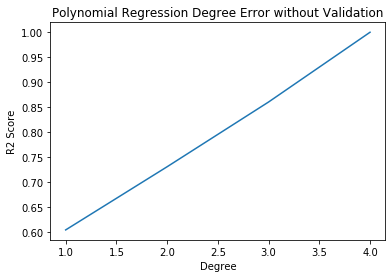

In [214]:
test_plot_X3 = [1, 2, 3, 4]
test_plot_y3 = [0.6040723105087087,0.7306037065554283, 0.8602834974143873, 0.9999999594063178]
plt.plot(test_plot_X3, test_plot_y3)
plt.title("Polynomial Regression Degree Error without Validation")
plt.xlabel("Degree")
plt.ylabel("R2 Score")

In [216]:
modern_nba_players=pd.read_csv("NBA_Modern_Salary_Career_Data_Split.csv")

In [218]:
modern_nba_players = modern_nba_players.drop(columns=['name', 'position', 'salary'])

In [227]:
modern_nba_players = modern_nba_players.to_numpy()

In [228]:
x = modern_nba_players[:,range(0,15)]
y = modern_nba_players[:,16]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [229]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.4903464785311701

Text(0, 0.5, 'Count of athletics')

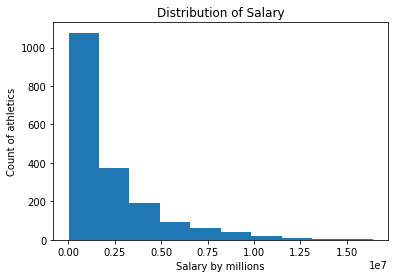

In [245]:
plt.hist(Y)
plt.title("Distribution of Salary")
plt.xlabel("Salary by millions")
plt.ylabel("Count of athletics")

Text(0, 0.5, 'Count of athletics')

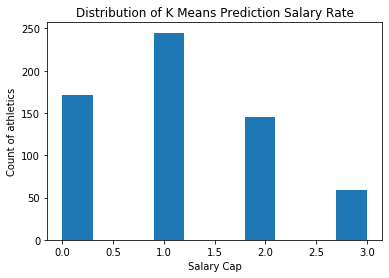

In [269]:
plt.hist(y_km)
plt.title("Distribution of K Means Prediction Salary Rate")
plt.xlabel("Salary Cap")
plt.ylabel("Count of athletics")

In [259]:
f_data = pd.read_csv("NBA_Career_Data_2.csv")
f_data = f_data.drop(columns=["salary", "name", "position"])
f_data = f_data.to_numpy()
X = f_data[:,range(15)]
Y = f_data[:,16]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
y_train.reshape(len(y_train), 1)
y_test.reshape(len(y_test), 1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [267]:
km2 = KMeans(n_clusters=4, init='random', n_init=10, max_iter=2000, tol=1e-04, random_state=0)
y_km = km2.fit_predict(X_test, y_test)
km2.score(X_test, y_test)

-5845083.118965109

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 3, 0, 1,
       3, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2,
       1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1,
       3, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 3,
       2, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 2, 3, 0, 3, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 3, 0, 2, 0, 2, 0, 1, 3, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       3, 0, 0, 0, 1, 1, 0, 2, 3, 2, 3, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 3, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 3,
       1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2,
       3, 3, 1, 0, 2, 2, 3, 3, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1,
       1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 1, 0, 1, 3, 3,
       1, 2, 0, 1, 3, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 2, 1, 0, 0, 1, 3, 1, 0, 1, 1, 1, 2, 2, 3,

In [264]:
y_test

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 2., 0., 3., 1.,
       0., 0., 1., 2., 0., 2., 0., 2., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       3., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 2., 0., 2., 0.,
       0., 0., 3., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 3., 0., 1., 2., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 3., 0., 1., 0., 1., 0.,
       0., 2., 0., 0., 0., 0., 0., 3., 1., 1., 0., 0., 0., 0., 1., 0., 2.,
       1., 1., 1., 3., 1., 2., 0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 1., 0., 1., 2.,
       1., 0., 1., 0., 2., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 1.,
       2., 0., 0., 1., 0., 1., 3., 0., 2., 0., 0., 1., 1., 0., 0., 2., 2.,
       0., 2., 1., 1., 0., 2., 0., 0., 0., 1., 2., 0., 0., 0., 0., 2., 0.,
       0., 1., 0., 0., 0., 3., 0., 0., 0., 0., 1., 2., 0., 0., 1., 1., 0.,
       0., 0., 0., 2., 0.

In [260]:
y_test

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 2., 0., 3., 1.,
       0., 0., 1., 2., 0., 2., 0., 2., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       3., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 2., 0., 2., 0.,
       0., 0., 3., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 3., 0., 1., 2., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 3., 0., 1., 0., 1., 0.,
       0., 2., 0., 0., 0., 0., 0., 3., 1., 1., 0., 0., 0., 0., 1., 0., 2.,
       1., 1., 1., 3., 1., 2., 0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 1., 0., 1., 2.,
       1., 0., 1., 0., 2., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 1.,
       2., 0., 0., 1., 0., 1., 3., 0., 2., 0., 0., 1., 1., 0., 0., 2., 2.,
       0., 2., 1., 1., 0., 2., 0., 0., 0., 1., 2., 0., 0., 0., 0., 2., 0.,
       0., 1., 0., 0., 0., 3., 0., 0., 0., 0., 1., 2., 0., 0., 1., 1., 0.,
       0., 0., 0., 2., 0.

In [274]:
reduced_data = PCA(n_components=2).fit_transform(X_train, y_train)
kmeans = KMeans(init='k-means++', n_clusters=4)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

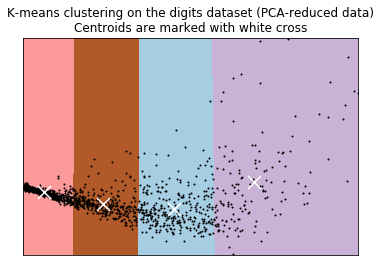

In [275]:
h = 0.2
x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:,1].min() - 1, reduced_data[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [315]:
Y_train = pd.DataFrame({'target':y_train})

In [316]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [317]:
finalDf = pd.concat([principalDf, Y_train], axis = 1)

In [320]:
finalDf['target']

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1251    0.0
1252    3.0
1253    0.0
1254    1.0
1255    0.0
Name: target, Length: 1256, dtype: float64

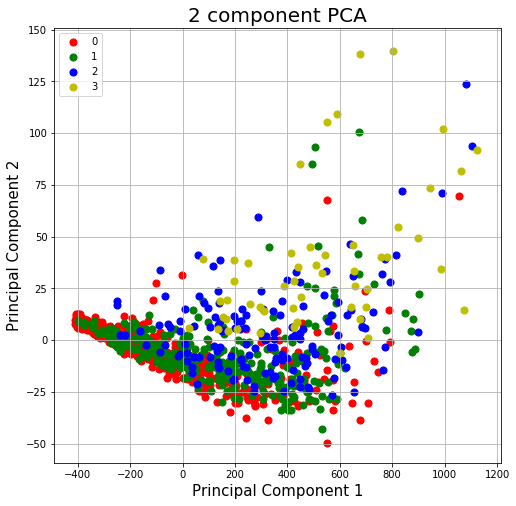

In [321]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3]
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()